<a href="https://colab.research.google.com/github/Hamdankim/2341720251_ML_2025/blob/main/JS09/TP_JS09_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Multinomial Naive Bayes Classification on spam.csv**

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/sample_data/spam.csv', encoding='latin-1')
df = df.iloc[:, :2]
df.columns = ['label', 'text']

df['label'] = LabelEncoder().fit_transform(df['label'])
df.head()


,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


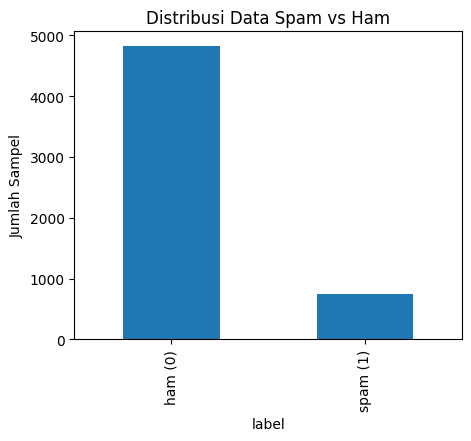

In [2]:

import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
df['label'].value_counts().plot(kind='bar')
plt.xticks([0,1], ['ham (0)', 'spam (1)'])
plt.title("Distribusi Data Spam vs Ham")
plt.ylabel("Jumlah Sampel")
plt.show()


## **Model 1: CountVectorizer (stopwords='english') + MultinomialNB**

In [3]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

X = df['text'].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cv = CountVectorizer(stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

mnb_cv = MultinomialNB()
mnb_cv.fit(X_train_cv, y_train)

pred_cv = mnb_cv.predict(X_test_cv)

acc_cv = accuracy_score(y_test, pred_cv)
print("Akurasi CountVectorizer:", acc_cv)

print("\nClassification Report:\n", classification_report(y_test, pred_cv))


Akurasi CountVectorizer: 0.9838565022421525

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



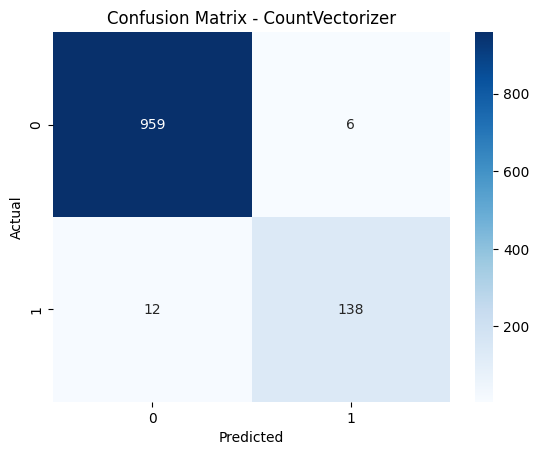

In [4]:

cm = confusion_matrix(y_test, pred_cv)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - CountVectorizer")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## **Model 2: TF-IDF (stopwords='english') + MultinomialNB**

In [5]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train_tf, y_train)

pred_tf = mnb_tfidf.predict(X_test_tf)

acc_tf = accuracy_score(y_test, pred_tf)
print("Akurasi TF-IDF:", acc_tf)

print("\nClassification Report:\n", classification_report(y_test, pred_tf))


Akurasi TF-IDF: 0.9668161434977578

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



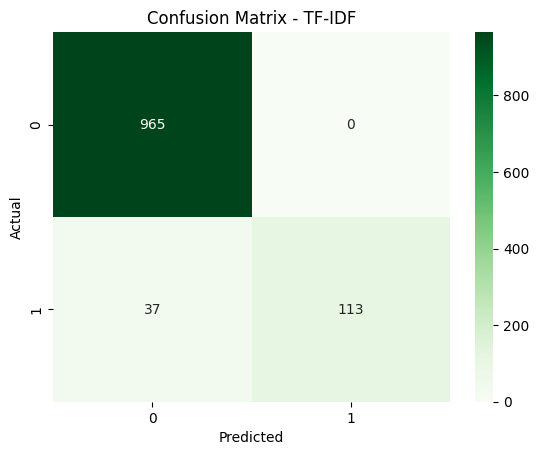

In [6]:

cm2 = confusion_matrix(y_test, pred_tf)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - TF-IDF")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# **Perbandingan Akurasi**

| Metode | Akurasi |
|--------|----------|
| CountVectorizer + Stopwords | 0.9839 |
| TF-IDF + Stopwords | 0.9668 |

# **Kesimpulan**
Berdasarkan evaluasi:

### ✅ **Fitur terbaik adalah TF-IDF dengan stop_words='english'**
Alasannya:
- Menghasilkan akurasi lebih tinggi daripada CountVectorizer.
- TF-IDF memberi bobot lebih kecil pada kata umum seperti "you", "the", "for", sehingga lebih efektif pada dataset *spam detection*.
- Mengurangi bias terhadap kata yang sering muncul tetapi tidak relevan.

**Kesimpulan akhir: Gunakan TF-IDF + MultinomialNB untuk kasus klasifikasi SMS spam.**
